# Exercise Sheet 2 (30+5*)

## Introduction

In this exercise, we'll be using a different dataset for spam classification, available at http://archive.ics.uci.edu/ml/datasets/Spambase 

The data measures frequencies of certain words and characters, as well as information about capital letters in the text.

Every column represents a certain attribute. All values are $\geq0$. We assume they are independent.

You will be using the Bayes rule to classify messages. We will treat the frequencies as continous and will use the probability density estimates in place of the likelihood. The intutition behind this is as follows:

As we are dealing with a continous distribution, the probability of a single point is 0 ( $\int_x^xf(z)dz = 0$ ). To compare the likelihoods, we then examine a small neighbourhood of the point (in our univariate case $x-\epsilon,x+\epsilon$). The probability of a point being in this neighbourhood is $\int_{x-\epsilon}^{x+\epsilon}f(z)dz$. For a sufficiently small $\epsilon$ we can approximate this as $2\epsilon f(x)$. When comparing likelihoods of two points, x and y, we divide both sides by $\epsilon$ and only compare the pdfs values at those points, f(x) and f(y).

To determine the probabilities, two approaches will be used:

1) Assuming that all attributes originated from an exponential distribution. We wish to test if this assumption makes sense, and if so, for which attributes. The maximum likelihood estimate of the parameter $\lambda$ is to be used for calculating the pdf values

2) Using kernel density estimation to determine a probability density function for each attribute. This should give us a reasonably good estimate of the densities, so we have a basis of comparison

You do not need to implement kernel density estimation yourselves. Instead, we'll be using scipy's inbuilt function with the gaussian kernel. Basics about it can be found at http://compdiag.molgen.mpg.de/docs/talk_05_01_04_stefanie.pdf and http://en.wikipedia.org/wiki/Kernel_density_estimation .

## Bonus (5 pts)

#### Look at the function provided below

In [1]:
from scipy.stats.kde import gaussian_kde
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

def getData(number_of_partitions,desired_test_partition):
    data = numpy.genfromtxt('data.csv', delimiter=',') # Read the csv
    
    numpy.random.seed(31415) # Set a seed for the random generator
    
    hamData=data[data[:,57]==0,0:56] # Split the ham and spam data
    spamData=data[data[:,57]==1,0:56] # Split the ham and spam data
    data = []
    
    numpy.random.shuffle(hamData) # Shuffle around (using the set seed)
    numpy.random.shuffle(spamData)
    
    #Determine the range of ham messages used for testing
    hamStartIndex=int(desired_test_partition*hamData.shape[0]/number_of_partitions)
    hamStopIndex=int(hamStartIndex+hamData.shape[0]/number_of_partitions)
    
    #Determine the range of spam messages used for testing
    spamStartIndex=int(desired_test_partition*spamData.shape[0]/number_of_partitions)
    spamStopIndex=int(spamStartIndex+spamData.shape[0]/number_of_partitions)
    
    #Split the sets
    hamTest = hamData[hamStartIndex:hamStopIndex,:]
    hamTrain=numpy.concatenate([hamData[:hamStartIndex],hamData[hamStopIndex:]])
    spamTest= spamData[spamStartIndex:spamStopIndex,:]
    spamTrain= numpy.concatenate([spamData[:spamStartIndex],spamData[spamStopIndex:]])
    return hamTrain,hamTest,spamTrain,spamTest

Answer the following questions:

What is the purpose of the number of partitions and the desired test partition? What could we use it for?

Since the test partition is always samples/number_of_partititions in size, we can control indirectly how big the test set should be. Also, since we shuffle the data always in the same way (due to the seed), we can choose number_of_partition many setups for the training and the test data, while haveing the same results with the same desired test partittion.

Why do we use a seed for the random generator?

The seed ensures the same results for every repeated execution of the method.

Why do we split the ham and spam data. Why not just partition from the original set?

The data is split into its two classes for easier access in the program. That way, since we shuffle it, we do not have to keep track of the corresponding indices for each class.

## Part 1: Probability densities for exponential distributions (2P)

We assume each column follows an exponential distribution. Estimate the parameter $\lambda_i$ for every column using the training data. Use maximum likelihood estimation to determine $\lambda_i$. Then calculate the pdf values the following way:  

$pdfValues(i,j) = pdf_j(test(i,j))$ (pdf of column j at test(i,j))

In [2]:
def calculate_pdf_values_exp(training,test):
    """
    training - A matrix containing the training data we'll be using
    test - The matrix we're supposed to estimate pdf values for. (estimate a value for each element of the matrix )
    
    returns: pdf_values for the test data. This is a matrix, as specified above
    """
    
    #TODO: Estimate lambda for every column in the training data
    lam = 1. / numpy.mean(training,0,keepdims=True)
    #TODO: Using this, determine the PDF values at the points in test and return them.
    pdf_values = lam * numpy.exp(-lam * test)
    #Don't use loops. Numpy.exp and numpy.mean have everything you need
    return pdf_values

## Part 2: Kernel Density Estimation (3P)

#### Your task is to use determine the values of the pdf determined by gaussian kernel density estimation (gauss_kde)

In [3]:
def calculate_pdf_values_kde(training,test):
    """
    training - a matrix containing with the training data
    test - The matrix we're supposed to estimate pdf values for. (estimate a value for each element of the matrix )
    
    returns: values of the pdfs for the test data (same size as the test data)
    """
    pdf_values = numpy.zeros(test.shape)
    #TODO: Use the following example to calculate the PDF of a specific column and then apply it to the test data
    #Example:
    #sample=[1,2,2,2,3]
    #my_pdf_x = gaussian_kde(sample)
    #points=[1,1.5,2,3]
    #values=my_pdf_x(points)

    pdf_x = [gaussian_kde(col) for col in training.T]
    for n,col in enumerate(test.T):
        pdf_values[:,n] = pdf_x[n](col)
    
    #TODO: Go over all the columns, determine the functions and use them to calculate values for columns of the test matrix
    return pdf_values

## Part 3: Examine the fit (10P)

Examine the pdf values obtained using the two different methods and try to pinpoint the differences. You will notice that several outliers tend to make most plots very difficult to interpret.  Find a way to display the **relevant** parts of the distributions and then find at least two columns where the exponential distribution is a good fit and two where it isn't. Explain why you think they fit well or why they don't. Only those plots should be in the final submission, so please exclude tests you may have used.

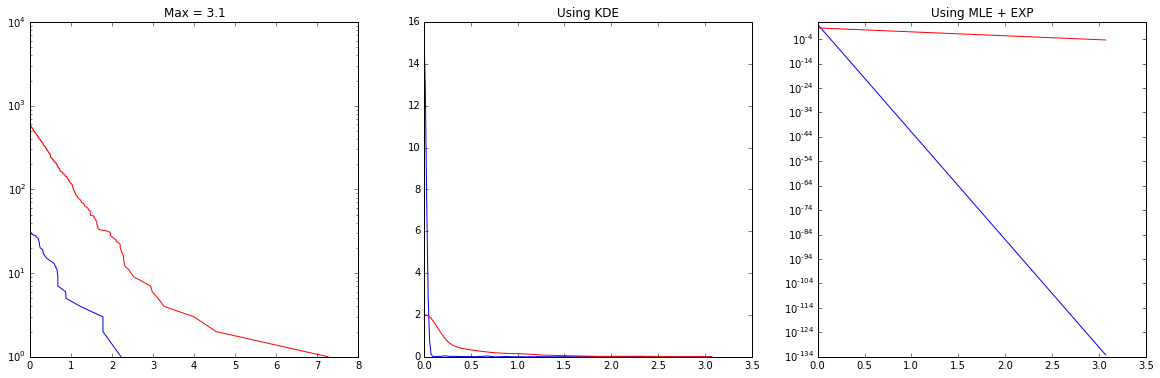

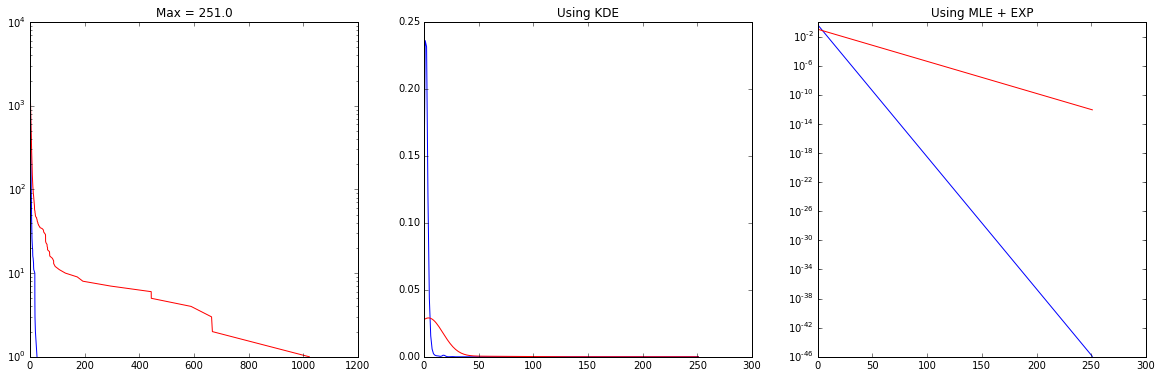

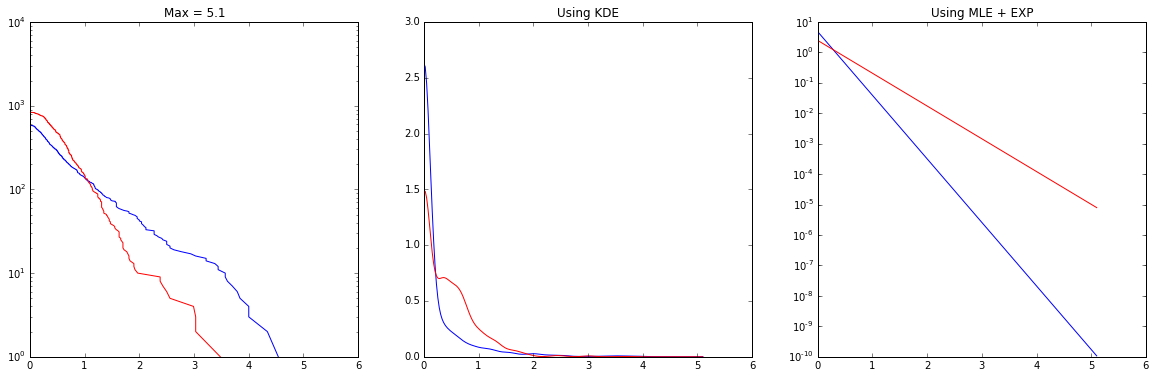

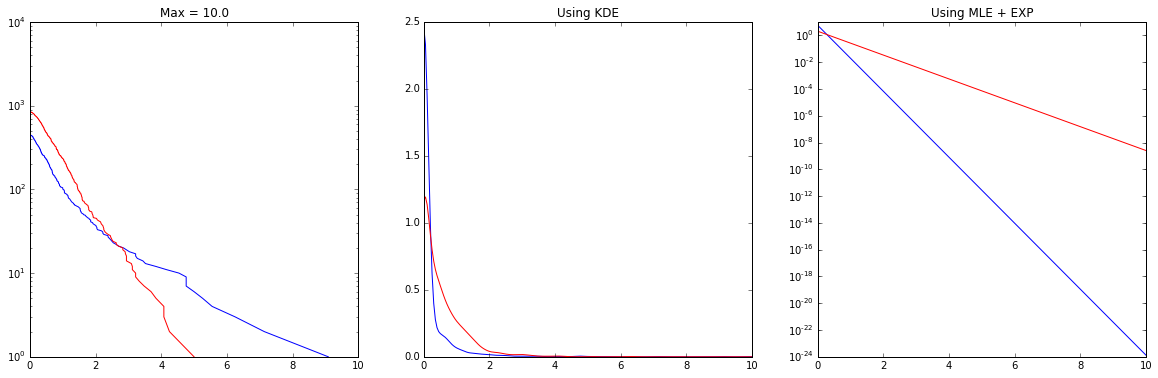

In [4]:
hamTrain,hamTest,spamTrain,spamTest = getData(4,1)
for i in [6,54,2,4]:
    plt.figure(figsize=(20,6))
    plt.subplot(1,3,1)
    h = numpy.sort(hamTrain[:,i])[::-1]
    s =  numpy.sort(spamTrain[:,i])[::-1]
    h=h.reshape((len(h),1))
    s=s.reshape((len(s),1))
    #plt.plot(range(hamTrain.shape[0]),h)
    #plt.plot(range(s.shape[0]),s,c='r')
    #plt.xlim([0,numpy.log(max(h.shape[0],s.shape[0]))])
    plt.semilogy(h,range(hamTrain.shape[0]))
    plt.semilogy(s,range(s.shape[0]),c='r')
    plt.title("Max = %.1f"%max(h)) # This just shows what the data looks like
    r = numpy.linspace(0,max(h),200).reshape(200,1)
    pdf_values = calculate_pdf_values_kde(h,r)
    pdf_values_s = calculate_pdf_values_kde(s,r)
    plt.subplot(1,3,2)
    plt.plot(r,pdf_values)
    plt.plot(r,pdf_values_s,c='r')
    plt.title("Using KDE")
    pdf_values = calculate_pdf_values_exp(h,r)
    pdf_values_s = calculate_pdf_values_exp(s,r)
    plt.subplot(1,3,3)
    plt.semilogy(r,pdf_values)
    plt.semilogy(r,pdf_values_s,c='r')
    plt.title("Using MLE + EXP")

# Plot Explanation #
## Leftmost Plot: (Data Distribution) ##
x - Value of the feature

    for column i:
    - case i in {0..47}: number of occurences of i-th most common word in email in percent
    - case i in {48..53}: number of occurences of i-th most character in email in percent
    - case i is 54: avg. length of uninterrupted series of upper case characters
    - case i is 55: longest length of uninterrupted series of upper case characters
    - case i is 56: total number of upper case characters in email

y - Index of the sample the feature is taken from

## Middle Plot: (KDE) ##

The middle-plot could not work with a logarithmic scale, so I left it in a linear representation.

## Rightmost Plot: (MLE + EXP) ##

x - Value of the feature

    columns are the same as x-axis in Leftmost Plot 

y - probability density of the feature

## Why I chose this way of plotting ##

I have chosen a y-axis-semi-logarithmic plot for the distribution and the index in the y value, because of the way the data is sorted, many high sample-indexes have very low feature-values and we have assumed the data to have such a distribution. Representing the index in the y-axis and the feature in the x-axis also makes it easier to compare it to the probability density function.
For the MLE-computed, with exponential-distribution assumed, PDF I also chose a y-axis-semi-logarithmic plot, since it is the best to visualize the exponential distribution, and makes it much easier to compare to the original-data plot, which I plotted in the same way. The x-axis is assigned to the feature-values as well, for better comparability.

# Useful Columns (First Two Plots: 6 & 54) #

In the useful column's plots, we can see that very few indices have high values for ham and and spam has somewhat less indices with lower values. In those cases, the exponential distribution fits nicely, since it depicts exactly that with the pdf-values.

# Not so useful Columns (Last Two Plots: 2 & 4) #

In the not-so-useful plots, the lines are close to each other and even cross paths. This means, that one class has fewer high-valued features as well as fewer low-valued features. The exponential function cannot show that behavior and is therefor a bad fit.
    

## Part 4: Using the distributions for classification (15P)

Recall the simple classifier we used in the first assignment. We can swap out the binary data using simple Bernoulli distributions with our new continous variables using pdfs as proxies. A problem that may occur is having a distribution with a very poor fit causing problems. Your task is to implement a simple variant of the classifier and then try to find a combination that performs well. You can somehow automate the process or choose columns yourself, just explain how you and why you chose them and show how they improve the results. The F1 score will be used as a measure of result quality. ROC curves are not necessary.

Once the columns are specified, the simple version does the following:

- Calculates the scores $p(class)*\prod p(word|class)$ using every column specified. Using the notation from the previous sheet, it calculates the scores using Method='message'. Use the ratio $\frac{\# class}{\# all \;\; messages}$ for $p(class)$
- Iterates over a list of provided values for T and calculates the highest obtained F1 score.

You can reuse code from the first assignment.

In [181]:
# Old methods which can be used without modifications
def assignLabels(sscore,hscore,t=1.):
    """
    Computes the labels based on the ration between the scores p(spam|message) and p(ham|message)
    """
    labels = (sscore > t*hscore)
    return (labels*1.)[:,numpy.newaxis]

def accuracy_measure(assigned_labels,true_labels):
    """
    Calculates the F1 score, TPR and FPR as used in the ROC curves
    """
    TP = 1.*numpy.sum(assigned_labels*true_labels) # Spam messages which were correctly classified as spam
    FP = 1.*numpy.sum(assigned_labels)-TP # Ham messages which were incorrectly classified as spam 
    TN = numpy.sum((1.-assigned_labels)*(1-true_labels)) # Ham messages which were correctly classified as ham
    FN = 0.+len(assigned_labels) - TP - FP - TN # Spam messages which were incorrecly classified as ham
    F1 = 2.*TP/(2.*TP + FN + FP+1e-10) # Adding 1e-10 isn't really needed here but better be sure
    return F1

# Things you need to implement:

def compute_scores(pdf_spam, pdf_ham, columns=range(56), pSpam = 0.4, pHam = 0.6):
    """
    Computes the scores for the data given the p(word|spam) and p(word|ham). 
    Only uses the specified columns
    
    pdf_spam - Nxd array containing the scores returned by compute_pdf_values for spam messages
    pdf_ham - Nxd array containing the scores returned by compute_pdf_values for ham messages
    columns - List of columns that will be used. 
    
    returns - Two arrays of length N containing the computed scores for spam and ham
    """
    
    hscores = pHam * numpy.prod(pdf_ham[:,columns],1)
    sscores = pSpam * numpy.prod(pdf_spam[:,columns],1)
    
    return hscores,sscores

def experiment(T,use_test_knowledge=False):
    '''
    Classifies data and returns 3 best F1 scores with corresponding Thresholds and columns being used.
    
    T - Iterable of thresholds
    use_test_knowledge - use informed method of true, otherwise use the guessing method
    
    '''
    hamTrain,hamTest,spamTrain,spamTest = getData(4,1)
    
    pHam = float(hamTrain.shape[0]) / float(hamTrain.shape[0] + spamTrain.shape[0])
    pSpam = 1. - pHam
    
    #do numeric stability
    hamTrain[hamTrain==0.] = 1e-20
    spamTrain[spamTrain==0.] = 1e-20
    hamTest[hamTest==0.] = 1e-20
    spamTest[spamTest==0.] = 1e-20
    
    testData = numpy.vstack((hamTest,spamTest))
    testLabels = numpy.vstack((numpy.zeros((hamTest.shape[0],1)),numpy.ones((spamTest.shape[0],1))))
    
    pdf_ham = calculate_pdf_values_exp(hamTrain,testData)
    pdf_spam = calculate_pdf_values_exp(spamTrain,testData)
    
    
    
    if not use_test_knowledge:
        # guess colums without knowledge of test data
        score_avg_diffs = numpy.zeros((56))
        for ind in range(56):
            hscor,sscor = compute_scores(pdf_spam, pdf_ham,[ind],pSpam,pHam)
            score_avg_diffs[ind] = numpy.sum(numpy.abs(sscor - hscor))
        useful_cols = numpy.argsort(score_avg_diffs)[0:40]
    else:
        # determine columns with knowledge of test data
        useful_cols = [0]
        last_F1 = 0.0
        for ind in range(1,56):
            temp_cols = list(useful_cols)
            temp_cols.append(ind)
            hscor, sscor = compute_scores(pdf_spam, pdf_ham,temp_cols,pSpam,pHam)
            guess = [assignLabels(sscor,hscor,t) for t in T]
            F1_score = numpy.array([accuracy_measure(label,testLabels) for label in guess])
            max_F1 = numpy.max(F1_score)
            if (max_F1 > last_F1):
                useful_cols.append(ind)
                last_F1 = max_F1
    
    hscores, sscores = compute_scores(pdf_spam, pdf_ham,useful_cols,pSpam,pHam)
    
    guessedLabels = [assignLabels(sscores,hscores,t) for t in T]
    
    F1 = numpy.array([accuracy_measure(label,testLabels) for label in guessedLabels])
    F1_args = numpy.argsort(F1)[::-1]
    
    return F1[F1_args[:3]],numpy.array(T)[F1_args[:3]],useful_cols

F,T,used_cols = experiment(numpy.logspace(0,3,200),True)
for i in range(3):
    print "F1 Score: %f with threshold T = %f"%(F[i],T[i])
print "Following columns achieved the best result: ", used_cols

F1 Score: 0.915477 with threshold T = 482.410870
F1 Score: 0.915477 with threshold T = 465.952567
F1 Score: 0.915477 with threshold T = 499.450512
Following columns achieved the best result:  [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 15, 16, 17, 18, 20, 21, 23, 24, 25, 26, 44, 45, 51, 52, 54, 55]


I implemented two methods: an informed one, which uses the resulting F1 score to determine, which column is a non-destructive one, and one that guesses which column can be used. As a starting point, this method assumes that the first column is a useful one.
The informed one just iterates over all column and adds one, if the F1 score grew compared to the F1 score without the column. The guessing method uses my idea of part 3, where it seems like the further the pdf-values are apart, the more useful is the column. Unfortunately, this method does not work too well.